Homography matrix H:
 [[ 7.26577891e-05 -2.28489626e-03  8.90344723e-01]
 [-1.34837560e-03  1.57361475e-03  4.55239290e-01]
 [-1.06309818e-05 -5.92734595e-06  5.82600746e-03]]


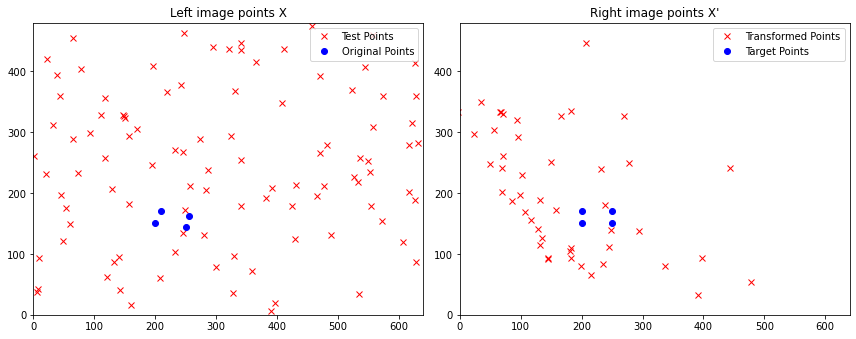

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define 4 points in the left image (source image)
X = np.array([
    [200, 250, 210, 255],  # x-coordinates
    [150, 145, 170, 162],  # y-coordinates
    [1, 1, 1, 1]           # homogeneous coordinate
], dtype=np.float64)

# Define corresponding 4 points in the right image (target image)
Xprime = np.array([
    [200, 250, 200, 250],
    [150, 150, 170, 170],
    [1, 1, 1, 1]
], dtype=np.float64)

# Construct matrix A such that Ah = 0
A = []
for i in range(X.shape[1]):
    x = X[:, i]
    xp = Xprime[:, i]
    A.append([-x[0], -x[1], -1, 0, 0, 0, xp[0]*x[0], xp[0]*x[1], xp[0]])
    A.append([0, 0, 0, -x[0], -x[1], -1, xp[1]*x[0], xp[1]*x[1], xp[1]])
A = np.array(A)

# Solve using SVD to get homography matrix H
_, _, Vt = np.linalg.svd(A)
h = Vt[-1, :]
H = h.reshape((3, 3))
print("Homography matrix H:\n", H)

# Generate random test points in left image (homogeneous coordinates)
Xtest = np.vstack((np.random.rand(2, 100) * np.array([[640], [480]]), np.ones((1, 100))))

# Transfer test points using homography
Xtestprime = H @ Xtest
Xtestprime /= Xtestprime[2, :]

# Plot both sets of points
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left image
axs[0].plot(Xtest[0, :], Xtest[1, :], 'rx', label='Test Points')
axs[0].plot(X[0, :], X[1, :], 'bo', label='Original Points')
axs[0].axis([0, 640, 0, 480])
axs[0].set_title("Left image points X")
axs[0].legend()
axs[0].set_aspect('equal')

# Right image
axs[1].plot(Xtestprime[0, :], Xtestprime[1, :], 'rx', label='Transformed Points')
axs[1].plot(Xprime[0, :], Xprime[1, :], 'bo', label='Target Points')
axs[1].axis([0, 640, 0, 480])
axs[1].set_title("Right image points X'")
axs[1].legend()
axs[1].set_aspect('equal')

plt.tight_layout()
plt.show()